<html>
<head>

<h1 style="color:red; font-size:30px; font-style:italic; font-alignment:center;">Title: Image Captioning using Deep Learning</h1>
<br><br>
<h1 style="color:black; font-style:italic; font-size:24px">Table of Contents</h1>
<br>
<ol>
    <li style='color:green; font-style:italic; font-size:20px'>Objective/Goal and Business Questions</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Introduction</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>About Data</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Evaluation Metrics</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Load Captions and Pre-process</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Feature Extraction From Images</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Model Training</li><br><br>
    <li style='color:green; font-style:italic; font-size:20px'>Conclusion</li><br><br>
</ol>

<h1 style='color:black; font-style:italic; font-size:24px'>1.&nbsp;&nbsp;Objective/Goal and Business Questions</h1>
<p style="color:green; font-style:italic; font-size:17px">
    The objective of this project is to generate text/caption from image without any human interfence.</p>
<p>
    <br>
    <p style="color: black; font-style: italic; font-size: 17px;">Que: What will be its exact business use?</p>
    <p style="color: blue; font-style: italic; font-size: 17px;">Ans: Its exact business use will be in the web search using an image, it can make blind person to understand what is present in surrounding and it can make a robot to understand as well and etc.</p>
    <br>
    <p style="color: black; font-style: italic; font-size: 17px;">Que: Do you need very less latency model?</p>
    <p style="color: blue; font-style: italic; font-size: 17px;">Ans: Yes, in this case we need very less latency model because in our use case more latency can be an issue in understanding the surroundings for robots and blind persons. In image search less latency will give quick image search result.</p>
    <br>
    <p style="color: black; font-style: italic; font-size: 17px;">Que: Do you do predictions in batch mode?</p>
    <p style="color: blue; font-style: italic; font-size: 17px;">Ans: No, we do not make predictions in batch mode.</p>
    <br>
    <p style="color: black; font-style: italic; font-size: 17px;">Que: Do you need very less latency model?</p>
    <p style="color: blue; font-style: italic; font-size: 17px;">Ans: Yes, in this case we need very less latency model because in our use case more latency can be an issue in understanding the surroundings for robots and blind persons. In image search less latency will give quick image search result on web.</p>
    <br>
    <p style="color: black; font-style: italic; font-size: 17px;">Que: Do you need real-time-model or batch-mode-model?</p>
    <p style="color: blue; font-style: italic; font-size: 17px;">Ans: The model should be real-time-model because we need text from image in real-time.</p>
    
<br><br>
<h1 style='color:black; font-style:italic; font-size:24px'>2.&nbsp;&nbsp;Introduction</h1>
<p style="color:green; font-style:italic; font-size:17px">
    1. In this project named Image Captioning, we will develop a deep learning based model which generate text for an image based on visual context present in the respected image.
    <br><br>
    2. This project can be used to extract text from huge image datasets.
    <br><br>
    3. This can also be used as image search means if you have have an image upload into the search engine image captioner will generate text based on the visual context present in the image and perform web search using generated text.
    <br><br>
    4. This can also be used for robots to understand what it is seeing.
    <br><br>
    5. Or person who can't see, by some means if we implement it in the blind person goggles then this model captures the images in some fixed timeinterval or by users command and generate text from captured image based on visual context present in the image and say it to the blind person by using text to voice generation method.
</p>
    
    
<br><br>
<h1 style='color:black; font-style:italic; font-size:24px'>3.&nbsp;&nbsp;About Data</h1>
<p style="color:green; font-style:italic; font-size:17px">
    1. The dataset is used in this project is very huge dataset particulary known as ms-coco-2017 image dataset.
    <br><br>
    2. In this dataset there are three sets: train, val and test are present.
    <br><br>
    3. Train set have 118K images, test set have 40K images and val set have 5K images with annotations (test set do not have annotations here)
    <br><br>
    4. The data set has been downloaded from <a href='https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset'>kaggle.com</a>
</p>

    
<br><br>   
<h1 style='color:black; font-style:italic; font-size:24px'>4.&nbsp;&nbsp;Evaluation Metric</h1>
<p style="color:green; font-style:italic; font-size:17px">
    1. Since, the project involves computer vision and natural language processing. 
    <br>First we need to extract the features from image using pre-trained model this feature extraction step is one time only hence we do not need any metric for this.
    <br><br>
    2. After feature extraction step, the extracted features and the tokenized captions will be passed to the sequence-to-sequence model that will be trained.
    <br><br>
    3. Now, during training we need a metric to monitor/evaluate the training. Since the output of the model is tokenized caption. Hence we will use the categorical crossentropy loss.
    <br><br>
    4. Once, the model is trained and achieves minimal loss.
    Then, we will generate/predict text for image and compare them with original caption. For this task we will use BLEU score from NLTK.
    <br><br>
    5. Finally, we will compare the BLEU score for train and val set to get generalised model.
    <br><br>
    6. Read more on BLEU score <a href="https://towardsdatascience.com/foundations-of-nlp-explained-bleu-score-and-wer-metrics-1a5ba06d812b"> here</a>.
</p>



<h1 style='color:black; font-style:italic; font-size:25px'>5.&nbsp;&nbsp;Load Captions and Pre-process</h1><br>
<ol>
<li style='color:green; font-style:italic; font-size:17px'>Loading captions from json file and pre-processing</li><br>
<li style='color:green; font-style:italic; font-size:17px'>Visualizing few captions and images</li><br>
<li style='color:green; font-style:italic; font-size:17px'>Diving through the number of words present in the captions in the data</li><br>
<li style='color:green; font-style:italic; font-size:17px'>Word Cloud</li>
</ol>

* Importing dependencies

In [1]:
import os
import glob
import pickle as pkl
import tqdm as tqdm
import gc
import re
import json
!pip install contractions
import contractions

Defaulting to user installation because normal site-packages is not writeable


In [2]:
root_dir = "D:\\projects\\image-captioning"
annotations_dir = "D:\\MS-COCO-2017-dataset\\coco2017\\annotations\\captions*.json"

<h1 style='color:black; font-style:italic; font-size:20px'>5.1&nbsp; Loading captions from json file and preprocessing</h1>

In [3]:
caption_files = glob.glob(annotations_dir)
caption_files

['D:\\MS-COCO-2017-dataset\\coco2017\\annotations\\captions_train2017.json',
 'D:\\MS-COCO-2017-dataset\\coco2017\\annotations\\captions_val2017.json']

* Loading captions

In [4]:
def load_raw_caption(path):
    with open(path, 'r') as f:
        raw_captions = json.load(f)
    return raw_captions

In [5]:
raw_train_captions = load_raw_caption(caption_files[0])
raw_val_captions = load_raw_caption(caption_files[1])

* Preprocessing and saving captions to disk...

In [6]:
raw_val_captions.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [7]:
raw_val_captions['annotations'][0]

{'image_id': 179765,
 'id': 38,
 'caption': 'A black Honda motorcycle parked in front of a garage.'}

In [8]:
raw_val_captions['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [9]:
def extract_words(sentence):
    sentence = ' '.join(contractions.fix(word) for word in sentence.split())
    return sentence

def preprocess(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-zA-Z]", ' ', sentence)
    sentence = ' '.join(x for x in sentence.split() if x.isalpha() and len(x)>1)
    sentence = extract_words(sentence)
    return sentence

In [10]:
# def preprocess_and_save_captions(raw_captions, name):
#     print(f"Extracting and cleaning {name} captions...", end='')
#     id_to_file_name = dict()
#     for data in raw_captions['images']:
#         id_to_file_name[data['id']] = data['file_name']
    
#     id_to_captions = dict()
#     for data in raw_captions['annotations']:
#         id_to_captions[data['image_id']] = data['caption']
        
#     captions = dict()
#     for ids, file_name in id_to_file_name.items():
#         cap = preprocess(id_to_captions[ids])
#         captions[file_name] = '<SOS> ' + cap + ' <EOS>'
        
#     print(f"saving...", end='')
#     with open(os.path.join(root_dir, name+'_captions_df.pkl'), 'wb') as f:
#         pkl.dump(captions, f)
#     print(f"done!")
    
#     return captions

In [11]:
def preprocess_and_save_captions(raw_captions, name):
    print(f"Extracting and cleaning {name} captions...", end='')
    id_to_file_name = dict()
    for data in raw_captions['images']:
        id_to_file_name[data['id']] = data['file_name']
    
    id_to_captions = dict()
    i = 0
    for data in raw_captions['annotations']:
        if data['image_id'] not in id_to_captions:
            id_to_captions[data['image_id']] = [data['caption']]
        else:
            id_to_captions[data['image_id']].append(data['caption'])
            
    
    captions = dict()
    for ids, file_name in id_to_file_name.items():
        captions_list = []
        for cap in id_to_captions[ids]:
            preprocessed_cap = preprocess(cap)
            captions_list.append('<sos> ' + preprocessed_cap + ' <eos>')
        captions[file_name] = captions_list
        
    print('done!', end='')
    print(f"saving...", end='')
    with open(os.path.join(root_dir, name+'_captions_list.pkl'), 'wb') as f:
        pkl.dump(captions, f)
    print(f"done!")
    
    return captions

In [12]:
train_captions = preprocess_and_save_captions(raw_train_captions, 'train')
val_captions = preprocess_and_save_captions(raw_val_captions, 'val')

Extracting and cleaning train captions...done!saving...done!
Extracting and cleaning val captions...done!saving...done!


<h1 style='color:black; font-style:italic; font-size:20px'>5.2&nbsp; Visualizing few captions and images</h1>

<sos> man is in kitchen making pizzas <eos>
<sos> man in apron standing on front of oven with pans and bakeware <eos>
<sos> baker is working in the kitchen rolling dough <eos>
<sos> person standing by stove in kitchen <eos>
<sos> table with pies being made and person standing near wall with pots and pans hanging on the wall <eos>


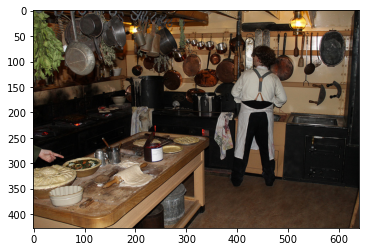


-------------------------------------------------------------------------------------------------------------------------------
<sos> the dining table near the kitchen has bowl of fruit on it <eos>
<sos> small kitchen has various appliances and table <eos>
<sos> the kitchen is clean and ready for us to see <eos>
<sos> kitchen and dining area decorated in white <eos>
<sos> kitchen that has bowl of fruit on the table <eos>


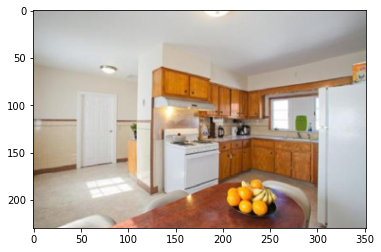


-------------------------------------------------------------------------------------------------------------------------------
<sos> person with shopping cart on city street <eos>
<sos> city dwellers walk by as homeless man begs for cash <eos>
<sos> people walking past homeless man begging on city street <eos>
<sos> homeless man holding cup and standing next to shopping cart on street <eos>
<sos> people are walking on the street by homeless person <eos>


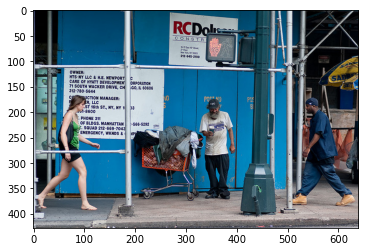


-------------------------------------------------------------------------------------------------------------------------------
<sos> person on skateboard and bike at skate park <eos>
<sos> man on skateboard performs trick at the skate park <eos>
<sos> skateboarder jumps into the air as he performs skateboard trick <eos>
<sos> athletes performing tricks on bmx bicycle and skateboard <eos>
<sos> man falls off his skateboard in skate park <eos>


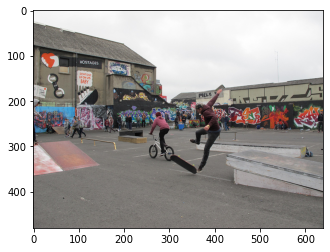


-------------------------------------------------------------------------------------------------------------------------------
<sos> blue bike parked on side walk <eos>
<sos> bicycle is chained to fixture on city street <eos>
<sos> blue bicycle sits on sidewalk near street <eos>
<sos> bicycle is locked up to post <eos>
<sos> bike sits parked next to street <eos>


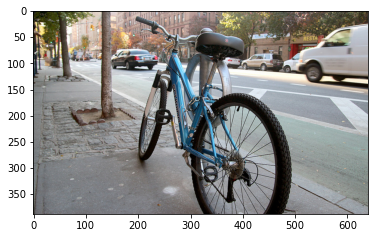


-------------------------------------------------------------------------------------------------------------------------------
<sos> bathroom that has broken wall in the shower <eos>
<sos> bathroom looks clean but is missing tile at the shower stall <eos>
<sos> view of bathroom that needs to be fixed up <eos>
<sos> shower toilet and sink in basement bathroom <eos>
<sos> very big whit rest room with shabby looking shower <eos>


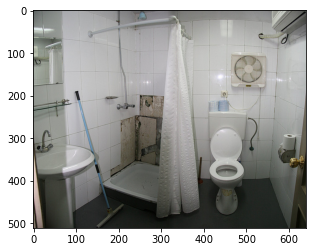


-------------------------------------------------------------------------------------------------------------------------------
<sos> couple of buckets in white room <eos>
<sos> bathroom with no toilets and red and green bucket <eos>
<sos> shower room with two buckets tolet paper holder and soap <eos>
<sos> standing toilet in bathroom next to window <eos>
<sos> this picture looks like janitors closet with buckets on the floor <eos>


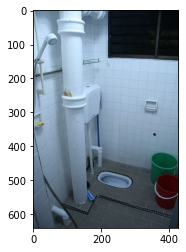


-------------------------------------------------------------------------------------------------------------------------------
<sos> the shiny motorcycle has been put on display <eos>
<sos> the new motorcycle on display is very shiny <eos>
<sos> motorcycle is parked inside of building <eos>
<sos> brand new motorcycle on display at show <eos>
<sos> the front end of red motorcycle that is on display <eos>


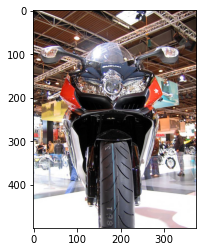


-------------------------------------------------------------------------------------------------------------------------------
<sos> row of white toilets sitting on top of dirt ground <eos>
<sos> bunch of dirty looking white toilets in row outside <eos>
<sos> there is row of used and broken toilets in field <eos>
<sos> row of toilets with broken seat tops on the ground <eos>
<sos> lots of broken toilets sitting out on lawn <eos>


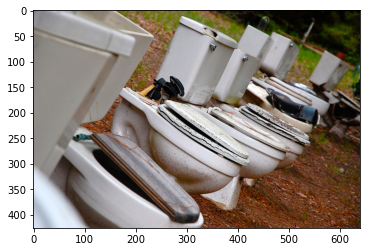


-------------------------------------------------------------------------------------------------------------------------------
<sos> small closed toilet in cramped space <eos>
<sos> tan toilet and sink combination in small room <eos>
<sos> this is an advanced toilet with sink and control panel <eos>
<sos> close up picture of toilet with fountain <eos>
<sos> off white toilet with faucet and controls <eos>


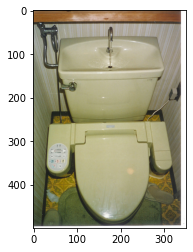


-------------------------------------------------------------------------------------------------------------------------------


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2 as cv

images_root_dir = "D:\\MS-COCO-2017-dataset\\coco2017"

i=1
for img_name, img_captions in val_captions.items():
    img_path = os.path.join(images_root_dir, 'val2017', img_name)
    for cap in img_captions:
        print(cap)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    print('')
    print('-'*127)
    if i == 10:
        break
    i+=1

<h1 style='color:black; font-style:italic; font-size:20px'>5.3&nbsp; Diving through the number of words present in the captions in the data</h1>

* Checking lengths of sentences

In [14]:
train_sent_length, val_sent_length = [], []

for k,v in train_captions.items():
    for cap in v:
        train_sent_length.append(len(cap.split(' ')))
    
for k,v in val_captions.items():
    for cap in v:
        val_sent_length.append(len(cap.split(' ')))

In [15]:
train_sent_length[:5], val_sent_length[:5]

([12, 12, 9, 25, 15], [8, 14, 10, 8, 20])

In [16]:
len(train_sent_length), len(val_sent_length)

(591753, 25014)

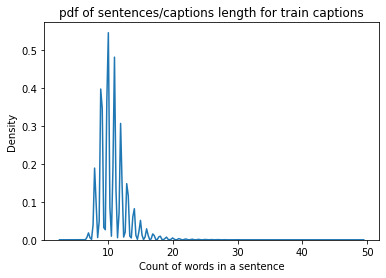

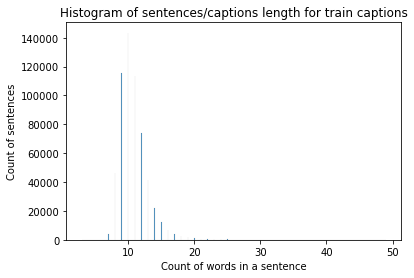

In [17]:
sns.kdeplot(train_sent_length)
plt.title("pdf of sentences/captions length for train captions")
plt.xlabel('Count of words in a sentence')
plt.show()

sns.histplot(train_sent_length)
plt.title("Histogram of sentences/captions length for train captions")
plt.xlabel('Count of words in a sentence')
plt.ylabel('Count of sentences')
plt.show()

In [18]:
print(f"Percentile of length of sentences/captions between 0th-100th with gap of 10 for train captions")
print('-'*100)
for i in range(0,101,10):
    print(f"# {i}th percentile: {np.percentile(train_sent_length, i)}")

Percentile of length of sentences/captions between 0th-100th with gap of 10 for train captions
----------------------------------------------------------------------------------------------------
# 0th percentile: 3.0
# 10th percentile: 9.0
# 20th percentile: 9.0
# 30th percentile: 10.0
# 40th percentile: 10.0
# 50th percentile: 10.0
# 60th percentile: 11.0
# 70th percentile: 11.0
# 80th percentile: 12.0
# 90th percentile: 13.0
# 100th percentile: 49.0


In [19]:
print(f"Percentile of length of sentences/captions between 90th-100th with gap of 1 for train captions")
print('-'*100)
for i in range(90,101):
    print(f"# {i}th percentile: {np.percentile(train_sent_length, i)}")

Percentile of length of sentences/captions between 90th-100th with gap of 1 for train captions
----------------------------------------------------------------------------------------------------
# 90th percentile: 13.0
# 91th percentile: 14.0
# 92th percentile: 14.0
# 93th percentile: 14.0
# 94th percentile: 14.0
# 95th percentile: 15.0
# 96th percentile: 15.0
# 97th percentile: 16.0
# 98th percentile: 17.0
# 99th percentile: 18.0
# 100th percentile: 49.0


In [20]:
print(f"Percentile of length of sentences/captions between 99th-100th with gap of 0.1 for train captions")
print('-'*100)
for i in [99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
    print(f"# {i}th percentile: {np.percentile(train_sent_length, i)}")

Percentile of length of sentences/captions between 99th-100th with gap of 0.1 for train captions
----------------------------------------------------------------------------------------------------
# 99.1th percentile: 19.0
# 99.2th percentile: 19.0
# 99.3th percentile: 20.0
# 99.4th percentile: 20.0
# 99.5th percentile: 21.0
# 99.6th percentile: 21.0
# 99.7th percentile: 22.0
# 99.8th percentile: 24.0
# 99.9th percentile: 27.0
# 100th percentile: 49.0


**Observation**
* From above plots and percentiles, we found that 99.9 percentage of captions having <= 27 words in train captions

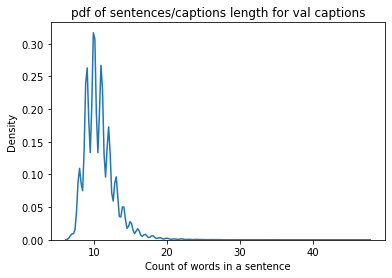

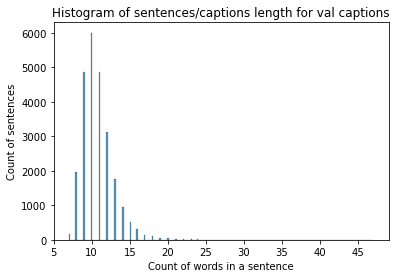

In [21]:
sns.kdeplot(val_sent_length)
plt.title("pdf of sentences/captions length for val captions")
plt.xlabel('Count of words in a sentence')
plt.show()

sns.histplot(val_sent_length)
plt.title("Histogram of sentences/captions length for val captions")
plt.xlabel('Count of words in a sentence')
plt.ylabel('Count of sentences')
plt.show()

In [22]:
print(f"Percentile of length of sentences/captions between 0th-100th with gap of 10 for val captions")
print('-'*100)
for i in range(0,101,10):
    print(f"# {i}th percentile: {np.percentile(val_sent_length, i)}")

Percentile of length of sentences/captions between 0th-100th with gap of 10 for val captions
----------------------------------------------------------------------------------------------------
# 0th percentile: 7.0
# 10th percentile: 9.0
# 20th percentile: 9.0
# 30th percentile: 10.0
# 40th percentile: 10.0
# 50th percentile: 10.0
# 60th percentile: 11.0
# 70th percentile: 11.0
# 80th percentile: 12.0
# 90th percentile: 13.0
# 100th percentile: 47.0


In [23]:
print(f"Percentile of length of sentences/captions between 90th-100th with gap of 1 for val captions")
print('-'*100)
for i in range(90,101):
    print(f"# {i}th percentile: {np.percentile(val_sent_length, i)}")

Percentile of length of sentences/captions between 90th-100th with gap of 1 for val captions
----------------------------------------------------------------------------------------------------
# 90th percentile: 13.0
# 91th percentile: 14.0
# 92th percentile: 14.0
# 93th percentile: 14.0
# 94th percentile: 14.0
# 95th percentile: 15.0
# 96th percentile: 15.0
# 97th percentile: 16.0
# 98th percentile: 16.0
# 99th percentile: 18.0
# 100th percentile: 47.0


In [24]:
print(f"Percentile of length of sentences/captions between 99th-100th with gap of 0.1 for val captions")
print('-'*100)
for i in [99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
    print(f"# {i}th percentile: {np.percentile(val_sent_length, i)}")

Percentile of length of sentences/captions between 99th-100th with gap of 0.1 for val captions
----------------------------------------------------------------------------------------------------
# 99.1th percentile: 18.0
# 99.2th percentile: 19.0
# 99.3th percentile: 19.0
# 99.4th percentile: 20.0
# 99.5th percentile: 20.0
# 99.6th percentile: 21.0
# 99.7th percentile: 22.0
# 99.8th percentile: 23.0
# 99.9th percentile: 26.0
# 100th percentile: 47.0


**Observation**
* From above plots and percentiles, we found that 99.9 percentage of captions having <= 26 words in val captions

#### Hence, taking max length of sentences/captions is "27"

<h1 style='color:black; font-style:italic; font-size:20px'>5.4&nbsp; Word Cloud</h1>

In [25]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from wordcloud import WordCloud

In [27]:
def plot_word_cloud(captions, name):
    captions_text = ''
    for k,v in captions.items():
        for cap in v:
            captions_text += ' '.join(x for x in cap.split(' ') if x != '<eos>' and x != '<sos>')
    print(f"{len(captions_text.split(' '))} words in the {name} captions.")
    print('-'*100)
    word_cloud = WordCloud(background_color='white', width=1600, height=1000, max_words=10000, collocations=False).generate(captions_text)
    
    plt.figure(figsize=(20,20))
    plt.imshow(word_cloud)
    plt.axis('off')
    # plt.title(f"Word Cloud for {name} captions")
    plt.show()

4619529 words in the train captions.
----------------------------------------------------------------------------------------------------


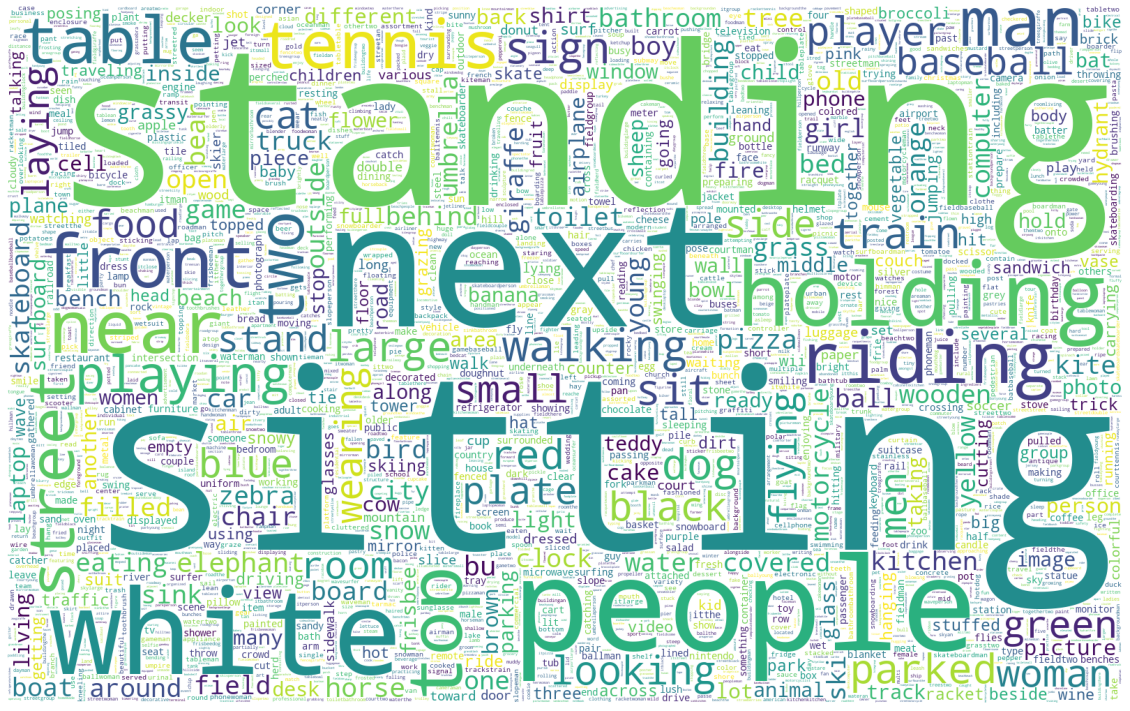

In [28]:
plot_word_cloud(train_captions, 'train')

195017 words in the val captions.
----------------------------------------------------------------------------------------------------


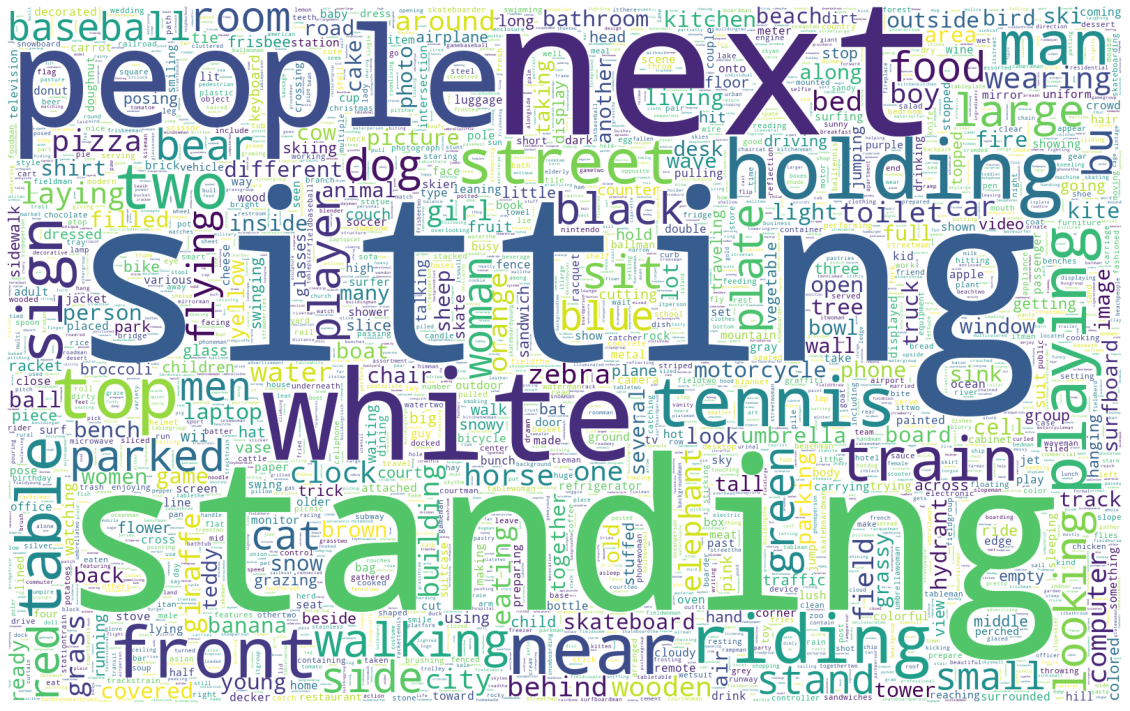

In [29]:
plot_word_cloud(val_captions, 'val')

**Observation**
* From the above word cloud, we can see that the words with high font size occurs frequently.
* Many words present in the both train and test set like: sitting, standing, next, white, tennis, street, playing, holding, etc.

In [30]:
gc.collect()

63441